<a href="https://colab.research.google.com/github/luiizsps/MachineLearning/blob/main/spam_detection_naiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# carrega o dataset
path = "datasets/completeSpamAssassin.csv"
df = pd.read_csv(path)
df.head(10)

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1
5,5,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1
6,6,Help wanted. We are a 14 year old fortune 500...,1
7,7,ReliaQuote - Save Up To 70% On Life Insurance\...,1
8,8,TIRED OF THE BULL OUT THERE?\nWant To Stop Los...,1
9,9,"Dear ricardo1 ,\nCOST EFFECTIVE Direct Email A...",1


In [ ]:
# exibe a quantidade total de emails
df.shape[0]

6046

In [ ]:
df['Label'].value_counts()

Label
0    4150
1    1896
Name: count, dtype: int64

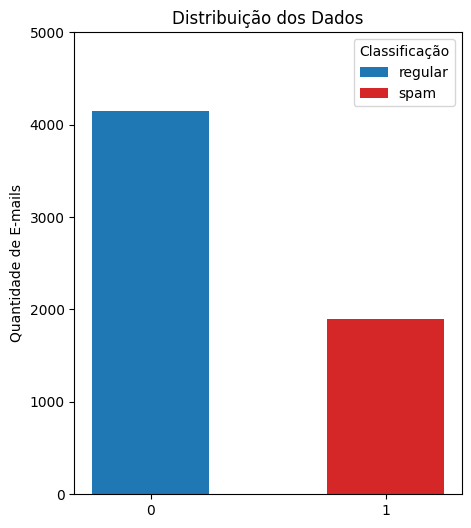

In [ ]:
import matplotlib.pyplot as plt

# exibe a distribuição dos dados das variáveis depedendentes
label = df['Label'].value_counts()

x_plot = ['0','1']
y_plot = [label[0], label[1]]
bar_labels = ['regular', 'spam']
bar_colors = ['tab:blue', 'tab:red']

fig, ax = plt.subplots(figsize=(5, 6))
ax.bar(x_plot, y_plot, label=bar_labels, color=bar_colors, width=0.5, align='center')
ax.set_ylabel('Quantidade de E-mails')
ax.set_title('Distribuição dos Dados')
ax.legend(title='Classificação')
ax.set_ylim(0, 5000)
plt.show()

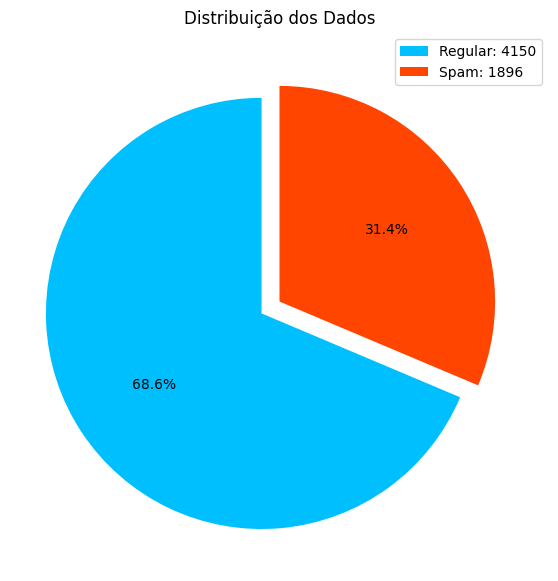

In [ ]:
# exibe a distribuição dos dados das variáveis depedendentes
label = df['Label'].value_counts()
counts = [label[0], label[1]]

x_plot = ['0','1']
labels = ['Regular', 'Spam']
explodir = (0.1, 0)
cores = ['deepskyblue', 'orangered']

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(counts, colors=cores, explode=explodir, autopct='%1.1f%%', shadow=False, startangle=90)

legend_labels = ['{}: {}'.format(classe, valor) for classe, valor in zip(labels, counts)]
ax.legend(legend_labels, loc='upper right')
ax.set_title('Distribuição dos Dados')

plt.show()

In [ ]:
import re

# usando expressão regular para remover caracteres especiais e colocando strings em "lower case"
def remover_caracteres_especiais(texto):
    texto_limpo = re.sub(r'[^a-zA-Z0-9\s]', ' ', texto)
    return texto_limpo

df['Body'] = [remover_caracteres_especiais(str(texto).lower()) for texto in df['Body']]
df['Body'].head(10)

0    \nsave up to 70  on life insurance \nwhy spend...
1    1  fight the risk of cancer \nhttp   www adcli...
2    1  fight the risk of cancer \nhttp   www adcli...
3                                                  ...
4    i thought you might like these \n1  slim down ...
5    a powerhouse gifting program you don t want to...
6    help wanted   we are a 14 year old fortune 500...
7    reliaquote   save up to 70  on life insurance\...
8    tired of the bull out there \nwant to stop los...
9    dear ricardo1  \ncost effective direct email a...
Name: Body, dtype: object

In [ ]:
# transforma texto em lista de palavras (tokenização)
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokeniza_texto(texto):
    return word_tokenize(texto)

df['Body'] = [tokeniza_texto(str(texto)) for texto in df['Body']]
df['Body'].head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\japs1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [save, up, to, 70, on, life, insurance, why, s...
1    [1, fight, the, risk, of, cancer, http, www, a...
2    [1, fight, the, risk, of, cancer, http, www, a...
3    [adult, club, offers, free, membership, instan...
4    [i, thought, you, might, like, these, 1, slim,...
5    [a, powerhouse, gifting, program, you, don, t,...
6    [help, wanted, we, are, a, 14, year, old, fort...
7    [reliaquote, save, up, to, 70, on, life, insur...
8    [tired, of, the, bull, out, there, want, to, s...
9    [dear, ricardo1, cost, effective, direct, emai...
Name: Body, dtype: object

In [ ]:
# encontra as palavras mais frequentes
from collections import Counter

todas_palavras = [palavra for lista_palavras in df['Body'] for palavra in lista_palavras]
contagem_de_palavras = Counter(todas_palavras)
palavras_mais_comuns = contagem_de_palavras.most_common(20)
print(palavras_mais_comuns)
palavras, contagens = zip(*palavras_mais_comuns)

[('the', 60854), ('to', 41641), ('and', 31557), ('of', 30110), ('a', 29899), ('in', 20032), ('you', 19603), ('is', 17759), ('i', 17489), ('for', 16969), ('that', 15019), ('it', 14746), ('http', 12217), ('this', 12042), ('on', 11375), ('s', 11297), ('com', 10553), ('your', 10155), ('with', 9412), ('be', 8547)]


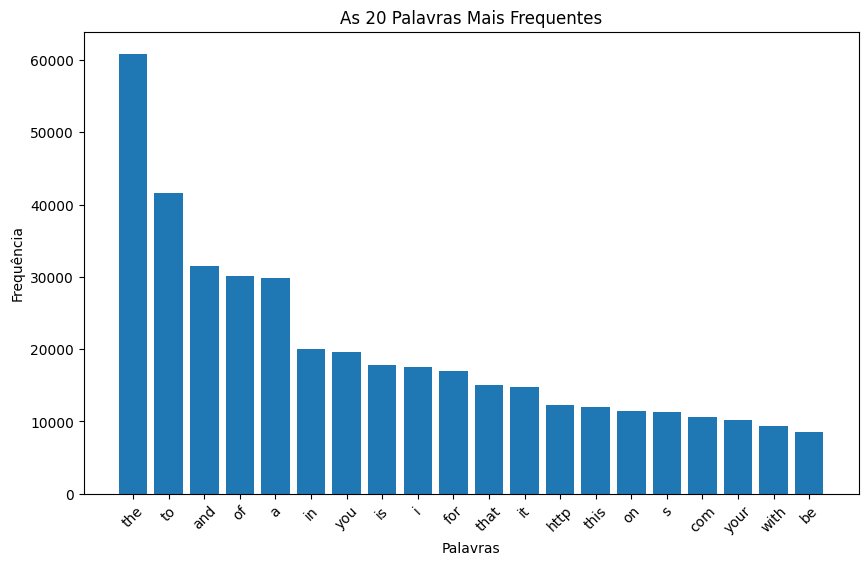

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(palavras, contagens)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('As 20 Palavras Mais Frequentes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# remove as stopwords, mantendo somente palavras significativas para o treinamento
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['Body'] = [[palavra for palavra in lista_tokens if palavra not in stop_words] for lista_tokens in df['Body']]
df['Body'].head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\japs1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [save, 70, life, insurance, spend, life, quote...
1    [1, fight, risk, cancer, http, www, adclick, w...
2    [1, fight, risk, cancer, http, www, adclick, w...
3    [adult, club, offers, free, membership, instan...
4    [thought, might, like, 1, slim, guaranteed, lo...
5    [powerhouse, gifting, program, want, miss, get...
6    [help, wanted, 14, year, old, fortune, 500, co...
7    [reliaquote, save, 70, life, insurance, life, ...
8    [tired, bull, want, stop, losing, money, want,...
9    [dear, ricardo1, cost, effective, direct, emai...
Name: Body, dtype: object

In [ ]:
# removendo números
df['Body'] = [[palavra for palavra in linha if not re.search(r'\d', palavra)] for linha in df['Body']]

In [ ]:
# encontra as palavras mais frequentes
from collections import Counter

todas_palavras = [palavra for lista_palavras in df['Body'] for palavra in lista_palavras]
contagem_de_palavras = Counter(todas_palavras)
palavras_mais_comuns = contagem_de_palavras.most_common(20)
print(palavras_mais_comuns)
palavras, contagens = zip(*palavras_mais_comuns)

[('http', 12217), ('com', 10553), ('www', 6635), ('net', 4970), ('list', 4879), ('linux', 4017), ('one', 3904), ('get', 3708), ('email', 3617), ('free', 3287), ('new', 2965), ('time', 2922), ('lists', 2806), ('e', 2782), ('mail', 2769), ('use', 2764), ('people', 2650), ('like', 2613), ('listinfo', 2608), ('would', 2579)]


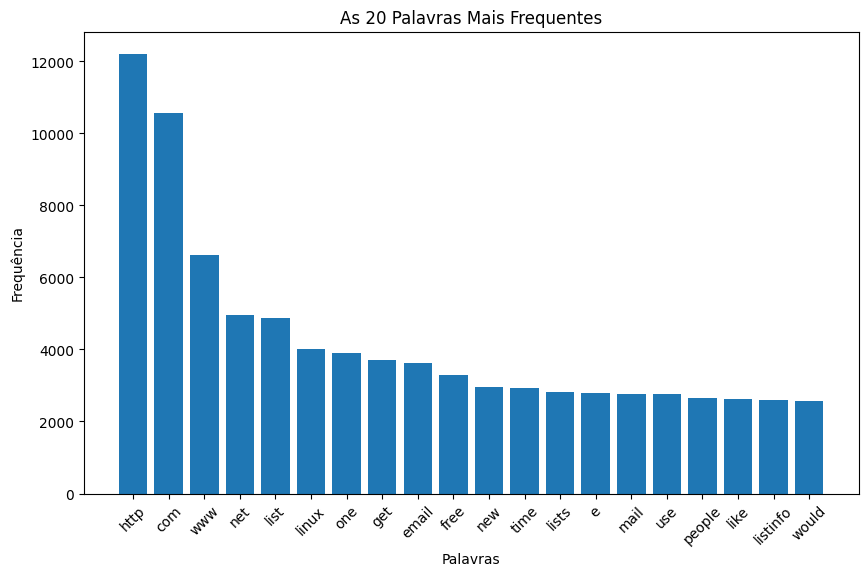

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(palavras, contagens)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('As 20 Palavras Mais Frequentes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# removendo palavras raras
limite_minimo_de_frequencia = 2

palavras_raras = [palavra for palavra, frequencia in contagem_de_palavras.items() if frequencia <= limite_minimo_de_frequencia]

def remover_palavras_raras(matriz, palavras_raras):
    return [palavra for palavra in matriz if palavra not in palavras_raras]

df['Body'] = remover_palavras_raras(df['Body'], palavras_raras)
df['Body'].head(10)

0    [save, life, insurance, spend, life, quote, sa...
1    [fight, risk, cancer, http, www, adclick, ws, ...
2    [fight, risk, cancer, http, www, adclick, ws, ...
3    [adult, club, offers, free, membership, instan...
4    [thought, might, like, slim, guaranteed, lose,...
5    [powerhouse, gifting, program, want, miss, get...
6    [help, wanted, year, old, fortune, company, gr...
7    [reliaquote, save, life, insurance, life, chan...
8    [tired, bull, want, stop, losing, money, want,...
9    [dear, cost, effective, direct, email, adverti...
Name: Body, dtype: object

In [ ]:
# normalizando os dados usando lematização
import spacy

nlp = spacy.load("en_core_web_sm")
df['Body'] = [[token.lemma_ for token in nlp(" ".join(linha))] for linha in df['Body']]
df['Body'].head(10)

0    [save, life, insurance, spend, life, quote, sa...
1    [fight, risk, cancer, http, www, adclick, ws, ...
2    [fight, risk, cancer, http, www, adclick, ws, ...
3    [adult, club, offer, free, membership, instant...
4    [think, might, like, slim, guarantee, lose, lb...
5    [powerhouse, gift, program, want, miss, get, f...
6    [help, want, year, old, fortune, company, grow...
7    [reliaquote, save, life, insurance, life, chan...
8    [tired, bull, want, stop, lose, money, want, r...
9    [dear, cost, effective, direct, email, adverti...
Name: Body, dtype: object

In [ ]:
# transformando nossa matriz de palavras em uma matriz numérica 'word embedding'
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

sentencas = [" ".join(palavras) for palavras in df['Body']]

# cria uma instância do CountVectorizer com codificação binária
vectorizer = CountVectorizer(binary=True)
X_data = vectorizer.fit_transform(sentencas)

# armazenando as palavras únicas
palavras_unicas = vectorizer.get_feature_names_out()

X_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
palavras_unicas

array(['aa', 'aaaaaa',
       'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
       ..., 'zzzzcard', 'zzzzcc', 'zzzzteana'], dtype=object)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Y_data = df['Label']
# divide o dataset mantendo a distribuição dos dados
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=5, stratify=Y_data)

# treina modelo multinomial NaiveBayes
model = MultinomialNB()
model.fit(X_train, y_train)

# avalia resultados usando acurácia e recall
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)


In [ ]:
resultados = {
    'Acurácia': [accuracy],
    'Precisão': [precision],
    'Recall': [recall],
    'F1-score': [f1_score]
}

print(resultados)

df_res = pd.DataFrame(resultados)
df_res.to_csv("resultados.csv", index=False)

{'Acurácia': [0.9498346196251378], 'Precisão': [0.8842443729903537], 'Recall': [0.9666080843585237], 'F1-score': [0.9235936188077246]}


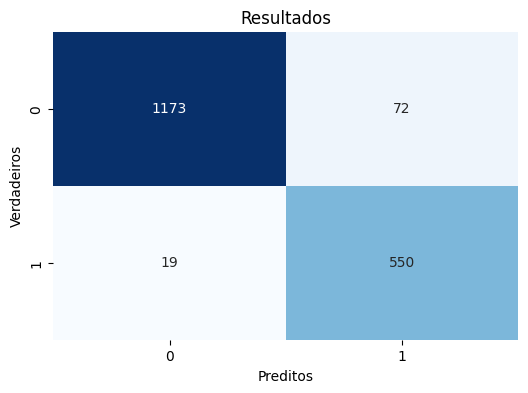

In [ ]:
# exibe resultados através de uma matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Preditos')
plt.ylabel('Verdadeiros')
plt.title('Resultados')
plt.show()

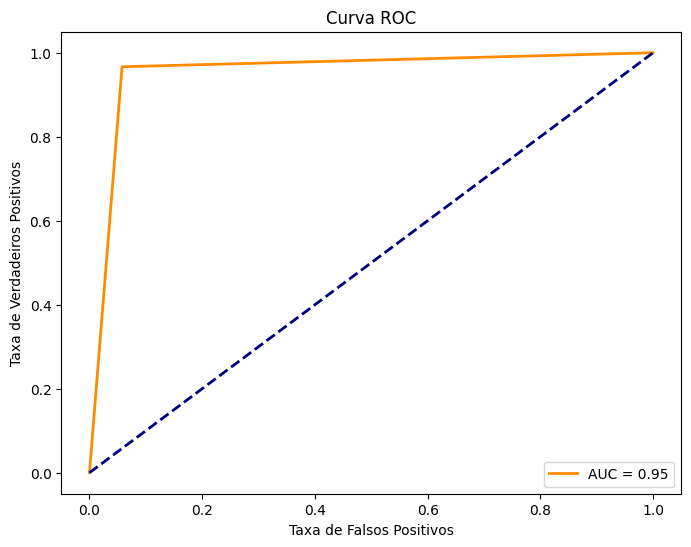

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcula a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calcula a Área sob a Curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plota a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
